In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

path_summary_json = '/media/immersive/KINGSTON/nnUnetData-and-Models/dataset/nnUNet_trained_models/Dataset116_small_tumors_MRI_lighter/nnUNetTrainerDiceTopK10Loss__nnUNetPlans__3d_lowres/fold_all/summary.json'
path_dataset_info_csv = '/media/immersive/KINGSTON/Breast-MRI-Dataset/data_sorted_by_size.csv'

In [2]:
with open(path_summary_json) as json_file:
    data_validation = json.load(json_file)

df_val = pd.DataFrame(columns= ['Subject ID', 'Tumor volume (voxels)', 'Tumor size [mm]' , 'TP', 'TN', 'FP', 'FN', 'Dice', 'PPV', 'TPR'])
# PPV = Precision, TPR = Sensitivity = Recall

median_volume = 1.0*176 *0.7031*490 * 0.7031*505       # [mm^3]
median_volume_per_voxel = median_volume / (176*490*505) # [mm^3/voxel]

for subject in data_validation['metric_per_case']:
    pred_file = subject['reference_file']
    metrics = subject['metrics']['1']
    tp, tn, fp, fn = metrics['TP'], metrics['TN'], metrics['FP'], metrics['FN']
    vol = tp + fn
    size = (vol * median_volume_per_voxel) ** (1/3)     # [mm]
    dc = metrics['Dice']
    ppv = tp / (tp + fp) if tp + fp != 0 else 0
    tpr = tp / (tp + fn) if tp + fn != 0 else 0
    id = pred_file.split('/')[-1].split('.')[0]
    row = pd.DataFrame({'Subject ID': [id], 'Tumor volume (voxels)': [vol], 'Tumor size [mm]': [size], 'TP': [tp], 'TN': [tn], 'FP': [fp], 'FN': [fn], 'Dice': [dc], 'PPV': [ppv], 'TPR': [tpr]})

    df_val = pd.concat([df_val, row], ignore_index=True)

In [3]:
# Sort by tumor volume
df_val = df_val.sort_values(by=['Tumor volume (voxels)'], ascending=True)
# pd.set_option('display.max_rows', None)       # Show whole df_val
df_val

,Subject ID,Tumor volume (voxels),Tumor size [mm],TP,TN,FP,FN,Dice,PPV,TPR
234,0889,44,2.791444,0,40893742,678,44,0.000000,0.000000,0.000000
156,0580,45,2.812433,0,38534442,681,45,0.000000,0.000000,0.000000
88,0336,45,2.812433,0,44039540,607,45,0.000000,0.000000,0.000000
108,0396,57,3.043007,0,33030087,0,57,0.000000,0.000000,0.000000
229,0855,80,3.407020,0,44038505,1607,80,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
178,0670,4614,13.163476,3070,38792486,212,1544,0.777609,0.935405,0.665366
243,0916,4637,13.185313,3026,41413673,442,1611,0.746700,0.872549,0.652577
61,0235,5094,13.604974,2352,44034521,577,2742,0.586314,0.803004,0.461720
33,0126,6561,14.802489,796,32106048,31,5765,0.215485,0.962515,0.121323


In [12]:
# Compute median of Dice
median_dice = np.median(df_val['Dice'])
print('Median Dice: ', median_dice)

Median Dice:  0.6331732545253048


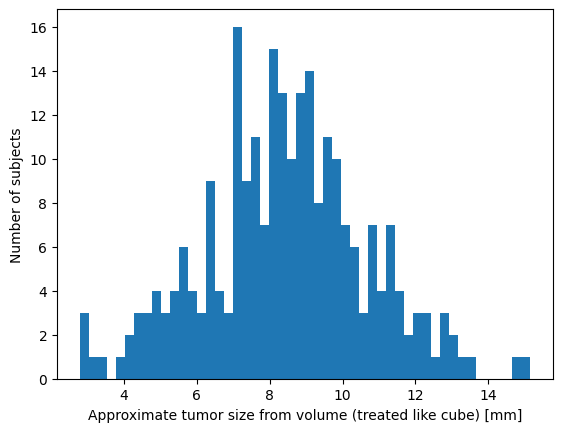

In [4]:
# Plot histogram of tumor size
plt.hist(df_val['Tumor size [mm]'], bins=50)
plt.xlabel('Approximate tumor size from volume (treated like cube) [mm]')
plt.ylabel('Number of subjects')
plt.show()

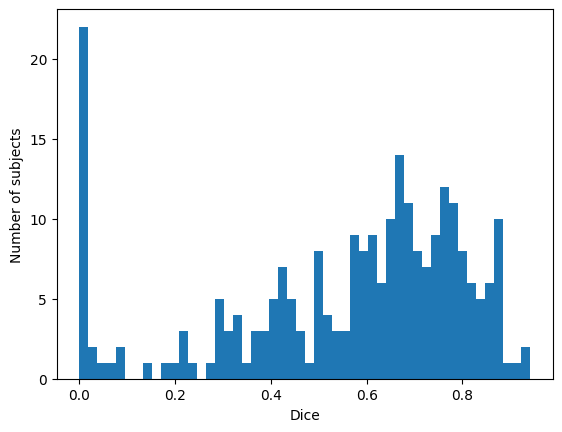

In [5]:
# Plot histogram of Dice
plt.hist(df_val['Dice'], bins=50)
plt.xlabel('Dice')
plt.ylabel('Number of subjects')
plt.show()

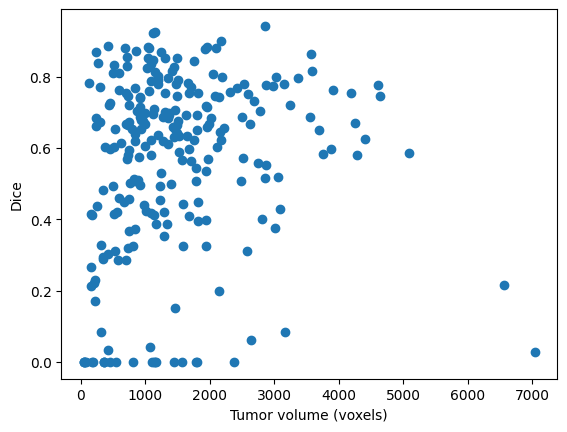

In [6]:
# Plot Dice vs tumor volume
plt.scatter(df_val['Tumor volume (voxels)'], df_val['Dice'])
plt.xlabel('Tumor volume (voxels)')
plt.ylabel('Dice')
plt.show()

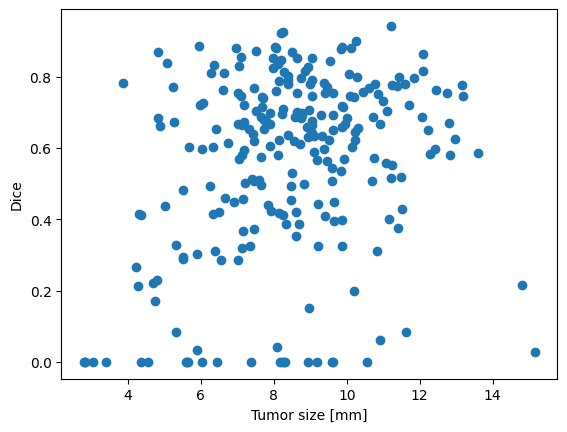

In [7]:
# Plot Dice vs tumor size
plt.scatter(df_val['Tumor size [mm]'], df_val['Dice'])
plt.xlabel('Tumor size [mm]')
plt.ylabel('Dice')
plt.show()

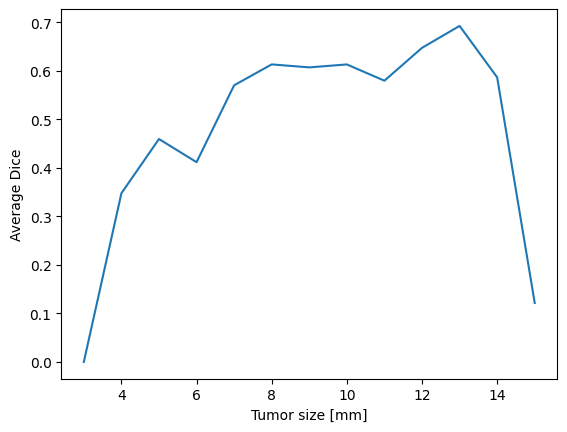

In [8]:
# Plot average Dice score as a function of tumor size
df_val_copy = df_val.copy()
df_val_copy['Tumor size [mm]'] = df_val_copy['Tumor size [mm]'].round(0)
df_val_copy = df_val_copy.groupby('Tumor size [mm]').mean()
plt.plot(df_val_copy['Dice'])
plt.xlabel('Tumor size [mm]')
plt.ylabel('Average Dice')
plt.show()

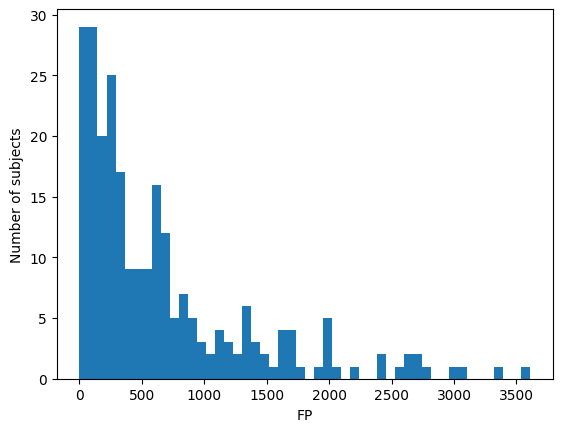

In [9]:
# Plot FP histogram
plt.hist(df_val['FP'], bins=50)
plt.xlabel('FP')
plt.ylabel('Number of subjects')
plt.show()

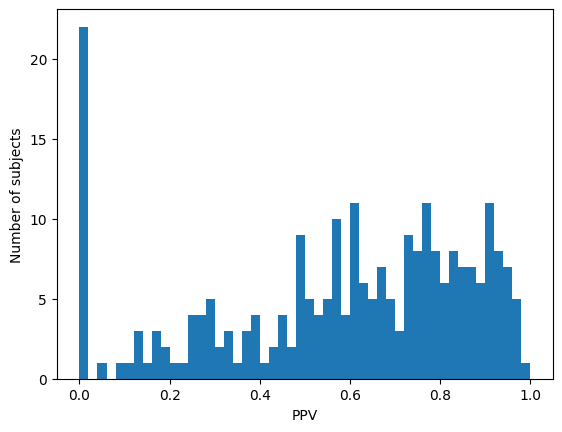

In [10]:
# Plot histogram of PPV
plt.hist(df_val['PPV'], bins=50)
plt.xlabel('PPV')
plt.ylabel('Number of subjects')
plt.show()

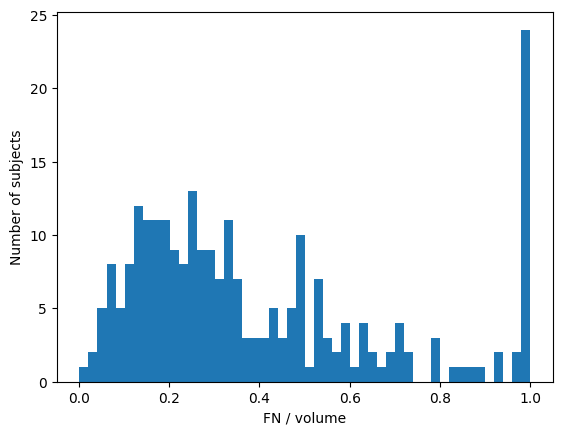

In [13]:
## Plot FN / volume histogram
plt.hist(df_val['FN'] / df_val['Tumor volume (voxels)'], bins=50)
plt.xlabel('FN / volume')
plt.ylabel('Number of subjects')
plt.show()